In [2]:
# import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# đọc dataset
facebook = pd.read_csv('/kaggle/input/users-on-fb/ueser_facebook.csv')
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
facebook.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [5]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [6]:
# kiểm tra số phần tử bị thiếu
facebook.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [7]:
# loại bỏ các thuộc tính null
facebook.dropna(inplace=True)
facebook.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [8]:
# kiểm tra trùng lặp
facebook.duplicated().sum()

0

In [9]:
#Loại bỏ các cột không cần thiết
# cols_to_drop = ['cột1', 'cột2', 'cột3'] 
# df = df.drop(cols_to_drop, axis=1)

In [10]:
# tạo một cột mới cho nhóm tuổi
age_grp=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook['age_group'] = pd.cut(facebook.age,bins=np.arange(10,121,10),labels=age_grp,right=True)
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [11]:
# tuổi tối đa trên facebook
facebook['age'].max()

113

In [12]:
age_group = facebook['age_group'].value_counts().reset_index()
age_group

,age_group,count
0,21-30,28634
1,10-20,24747
2,31-40,12487
3,51-60,9288
4,41-50,8962
5,61-70,6830
6,101-110,3409
7,71-80,2234
8,91-100,1201
9,81-90,803


<Axes: xlabel='age_group', ylabel='count'>

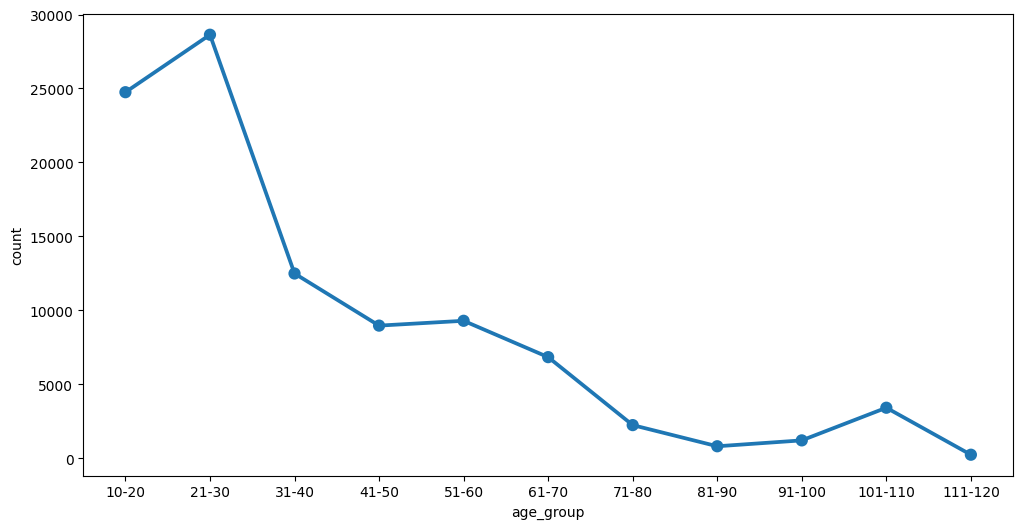

In [13]:
# biểu đồ age_group
plt.figure(figsize=(12, 6))
sns.pointplot(x='age_group', y='count', data=age_group)

In [14]:
age_20s = facebook[ (facebook['age'] > 20) & (facebook['age'] <= 30) ]
age_20s

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
302,1724334,21,21,1992,11,male,251.0,0,0,0,0,0,0,0,0,21-30
303,1439541,21,4,1992,11,male,16.0,0,0,0,0,0,0,0,0,21-30
304,1787342,21,29,1992,12,male,1244.0,0,0,0,0,0,0,0,0,21-30
305,1592756,21,25,1992,12,male,669.0,0,0,0,0,0,0,0,0,21-30
306,2160210,21,31,1992,12,male,11.0,0,0,0,0,0,0,0,0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98988,1729341,21,20,1992,10,male,587.0,2784,809,5177,5423,4759,3278,418,2145,21-30
98989,1008872,25,5,1988,9,female,273.0,2332,1849,6135,4952,6029,4547,106,405,21-30
98996,1668695,24,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057,21-30
98997,1458985,28,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018,21-30


In [15]:
df = age_20s['age'].value_counts().sort_values(ascending=False).reset_index()
df

,age,count
0,23,4402
1,21,3670
2,25,3636
3,22,3032
4,24,2827
5,26,2814
6,28,2363
7,27,2239
8,29,1935
9,30,1716


<Axes: xlabel='age', ylabel='count'>

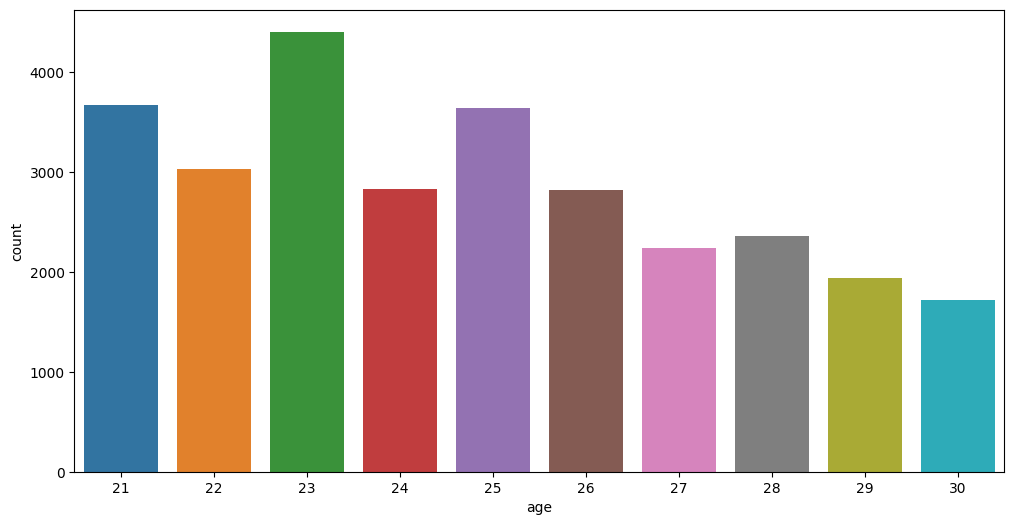

In [16]:
# dự đoán số lượng từng lứa tuổi trong nhóm tuổi lớn nhất
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', data=df)

In [17]:
gender = facebook['gender'].value_counts().reset_index()
gender

,gender,count
0,male,58574
1,female,40252


<Axes: xlabel='gender', ylabel='count'>

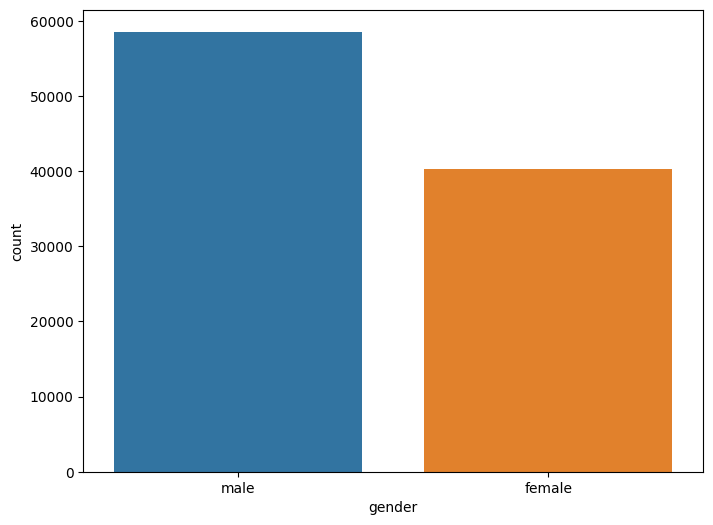

In [18]:
# biểu đồ giới tính
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=facebook)

In [19]:
age_gender_group = facebook[['age_group', 'gender']].value_counts().sort_values(ascending=False).reset_index()
age_gender_group

,age_group,gender,count
0,21-30,male,18828
1,10-20,male,15044
2,21-30,female,9806
3,10-20,female,9703
4,31-40,male,7799
5,41-50,male,5031
6,51-60,female,4921
7,31-40,female,4688
8,51-60,male,4367
9,41-50,female,3931


Text(0.5, 0, 'age')

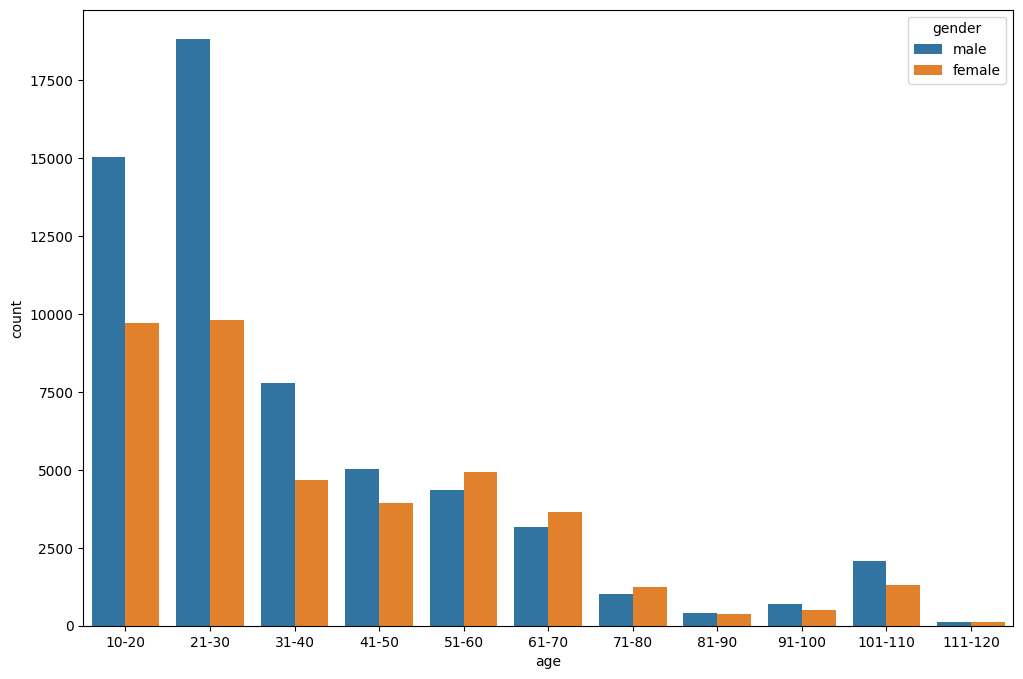

In [20]:
# biểu đồ age_gender_group
plt.figure(figsize=(12, 8))
sns.barplot(data=age_gender_group, x='age_group', y='count', hue='gender')
plt.xlabel('age')

In [21]:
df_gender = age_20s[['age', 'gender']].value_counts().sort_values(ascending=False).reset_index()
df_gender

,age,gender,count
0,23,male,2964
1,25,male,2443
2,21,male,2335
3,22,male,1900
4,26,male,1899
5,24,male,1852
6,28,male,1584
7,27,male,1477
8,23,female,1438
9,21,female,1335


<Axes: xlabel='age', ylabel='count'>

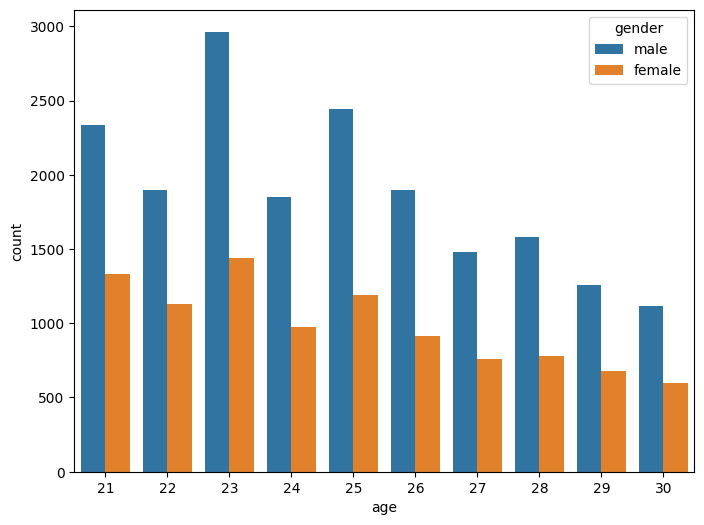

In [22]:
# biểu đồ giới tính ở nhóm tuổi lớn nhất
plt.figure(figsize=(8, 6))
sns.barplot(data=df_gender, x='age', y='count', hue='gender')

<Axes: xlabel='age_group', ylabel='friend_count'>

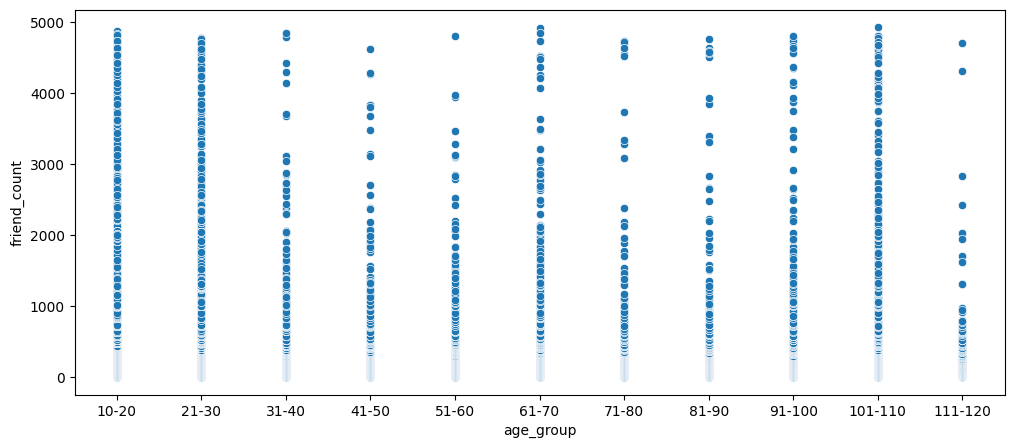

In [23]:
# biểu đồ số lượng bạn bè theo từng nhóm tuổi
plt.figure(figsize=(12, 5))
sns.scatterplot(x='age_group', y='friend_count', data=facebook)

In [24]:
ages_friend_count = facebook[['age_group', 'friend_count']]['age_group'].value_counts().reset_index()
ages_friend_count

,age_group,count
0,21-30,28634
1,10-20,24747
2,31-40,12487
3,51-60,9288
4,41-50,8962
5,61-70,6830
6,101-110,3409
7,71-80,2234
8,91-100,1201
9,81-90,803


<Axes: xlabel='age_group', ylabel='count'>

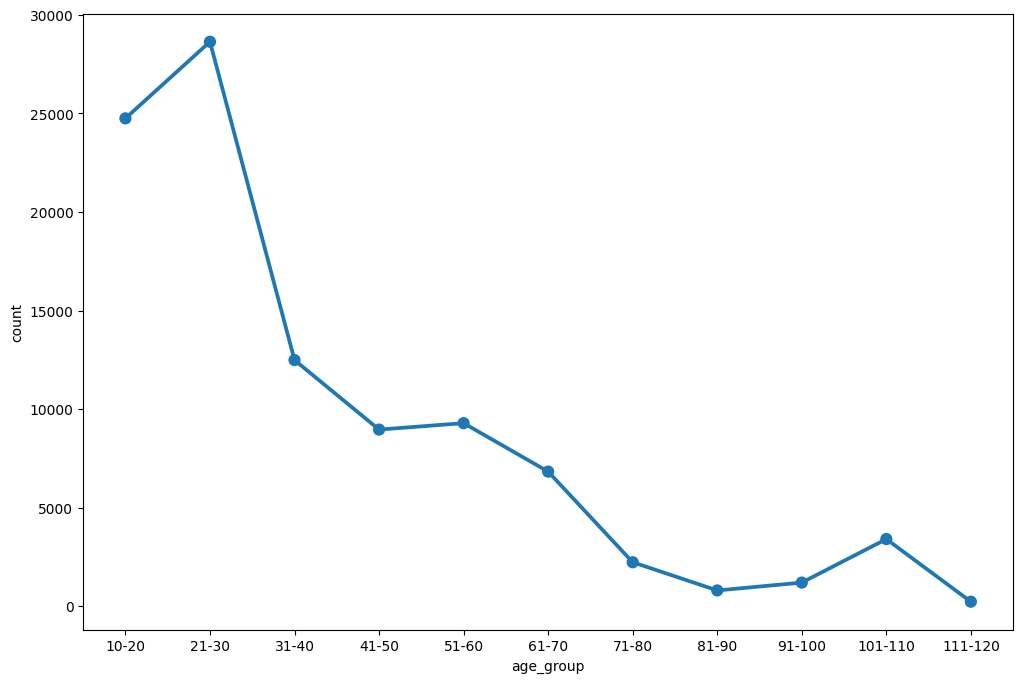

In [25]:
# trực quan hóa số lượng bạn bè cho từng nhóm tuổi
plt.figure(figsize=(12, 8))
sns.pointplot(x='age_group', y='count', data=ages_friend_count)

<Axes: xlabel='age_group', ylabel='likes_received'>

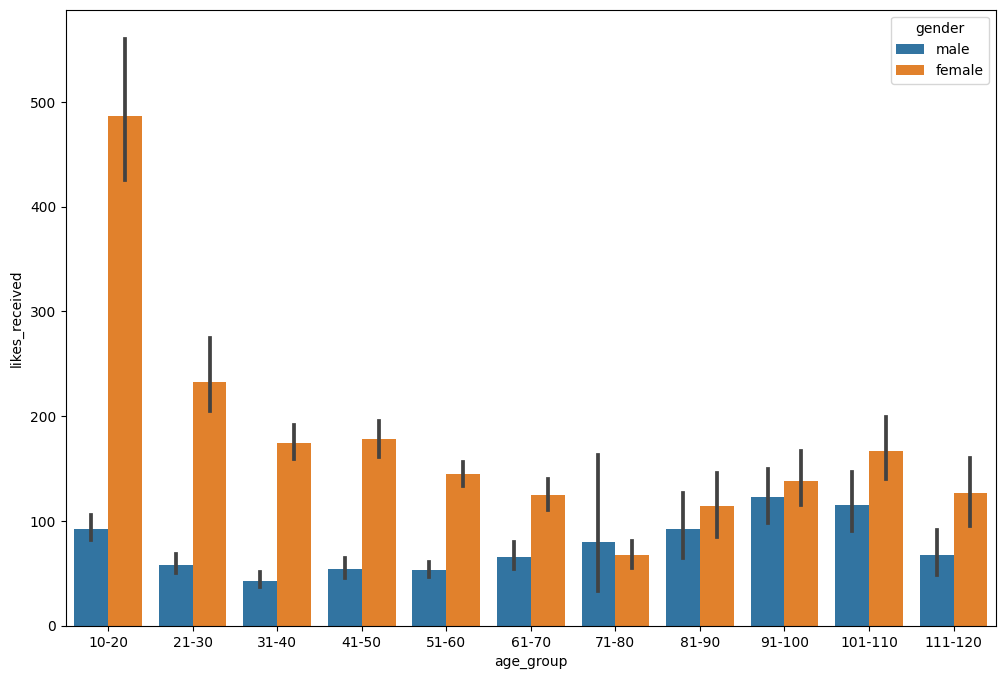

In [26]:
# trực quan hóa lượt likes_received cho từng giới tính ở từng nhóm tuổi
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='likes_received', data=facebook, hue='gender')

<Axes: xlabel='age_group', ylabel='likes'>

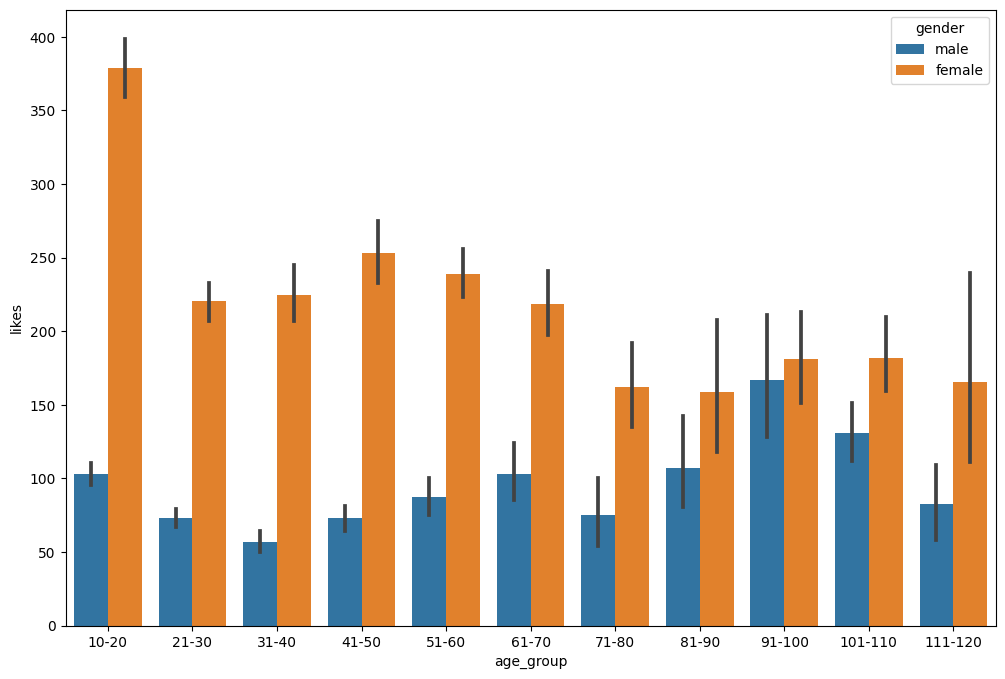

In [27]:
# dự đoán lượt thích cho từng giới tính ở từng nhóm tuổi
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='likes', data=facebook, hue='gender')

In [28]:
df_10s = facebook[ (facebook['age'] > 10) & (facebook['age'] <= 20) ]
df_10s

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20
98995,1132164,20,9,1993,10,female,699.0,3611,973,4507,7768,4414,6909,93,859,10-20
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20


<Axes: xlabel='count', ylabel='age'>

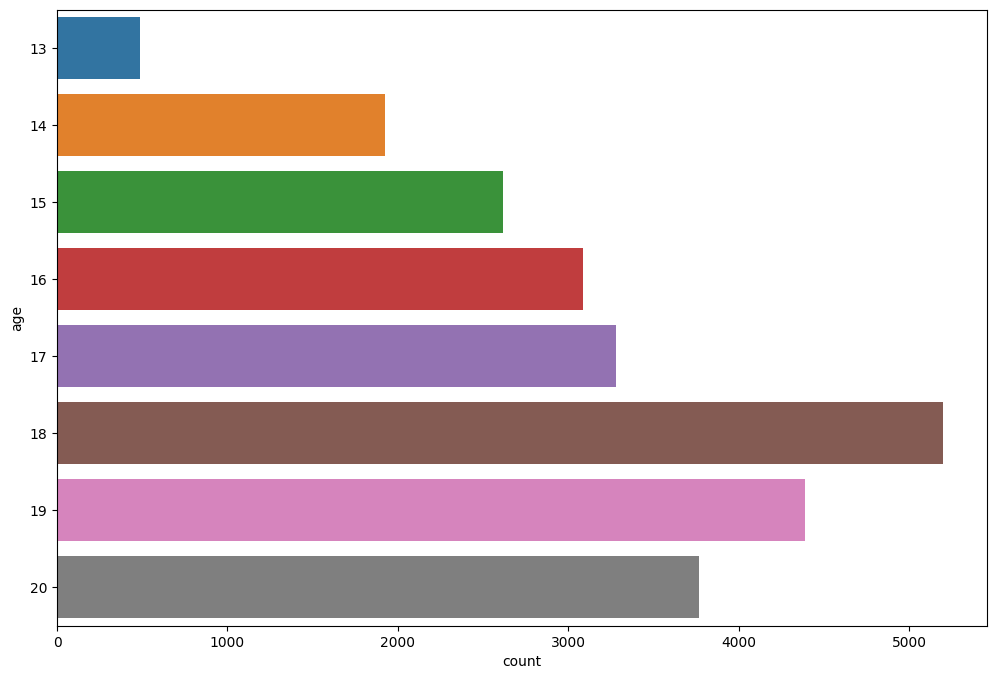

In [29]:
# dự đoán tần số của từng độ tuổi từ 11 đến 20
plt.figure(figsize=(12, 8))
sns.countplot(y='age', data=df_10s)

<Axes: xlabel='age', ylabel='likes'>

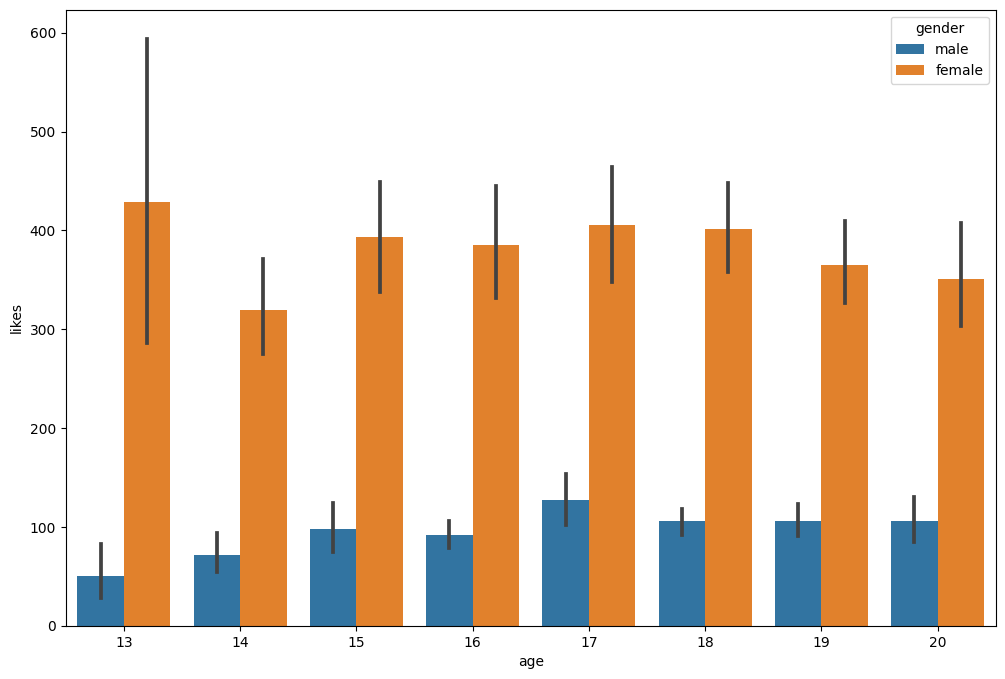

In [30]:
# dự đoán lượt thích cho từng giới tính trong nhóm này (11-20)
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='likes', data=df_10s, hue='gender')

<Axes: xlabel='age', ylabel='likes_received'>

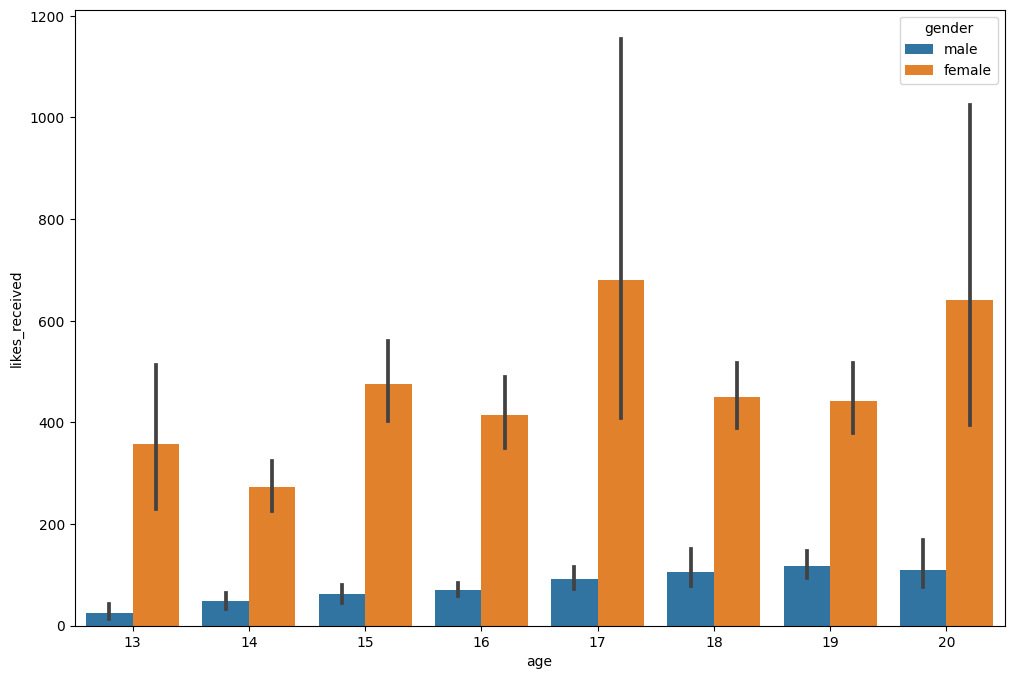

In [31]:
# dự đoán lượt likes_received cho từng giới tính trong nhóm này (11-20)
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='likes_received', data=df_10s, hue='gender')